In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

# 1. Implementing K-means

In [2]:
data = loadmat('ex7/ex7data2.mat')
X = data['X']

X.shape

(300, 2)

# Visual data

Text(0, 0.5, 'X2')

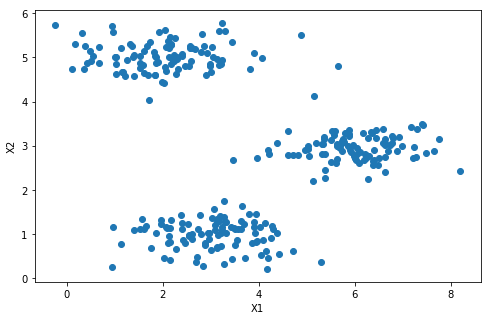

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')

# Calculate the Distance C and Update the Cluster Coordinates

In [4]:
def get_c(X, cent):
    c_list = []
    for i in range(len(X)):
        minus = X[i] - cent
        d = minus[:, 0]**2 + minus[:, 1]**2
        c = np.argmin(d)
        c_list.append(c)
        
    return np.array(c_list)

def minus_updata(X, c):
    minus = []
    for i in range(len(np.unique(c))):
        new_minus = X[c==i].mean(axis=0)
        minus.append(new_minus)
    
    return np.array(minus)

# A given cluster

In [5]:
init_minus = np.array([[3, 3], [6, 2], [8, 5]])

Text(0, 0.5, 'X2')

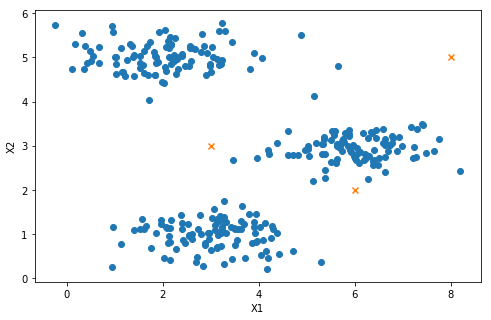

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(init_minus[:, 0], init_minus[:, 1], marker='x')
plt.xlabel('X1')
plt.ylabel('X2')

# Fitting

In [7]:
epoch = 20

In [8]:
minus = init_minus
all_minus = []
for i in range(epoch):
    all_minus.append(minus)
    c = get_c(X, minus)
    minus = minus_updata(X, c)

# Visual result

Text(0, 0.5, 'X2')

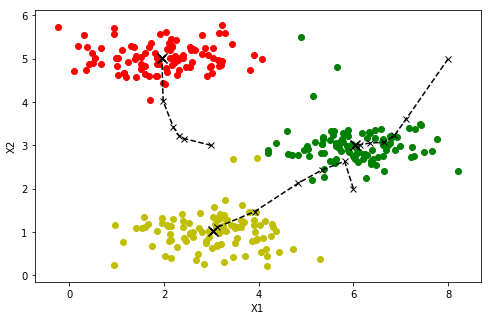

In [9]:
plt.figure(figsize=(8, 5))

xx = []
yy = []
for m in all_minus:
    xx.append(m[:, 0])
    yy.append(m[:, 1])
plt.plot(xx, yy, 'kx--')

color = ['r', 'y', 'g']
for i in range(max(c)+1):
    for j in X[c==i]:
        plt.scatter(j[0], j[1], c=color[i])

plt.scatter(minus[:, 0], minus[:, 1], marker='x', c='k', s=100)
plt.xlabel('X1')
plt.ylabel('X2')

# In sklearn

In [3]:
from sklearn.cluster import KMeans

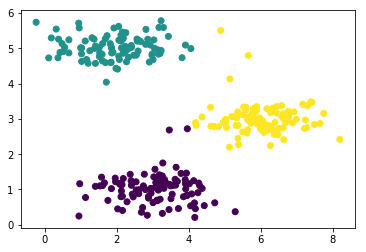

In [4]:
y_pred = KMeans(3).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Random initialization

In [10]:
def random_init(X, K):
    return X[np.random.choice(len(X), K)]

In [11]:
minus_list = []
num = 3
for i in range(num):
    minus_list.append(random_init(X, 3))

minus_list[0], len(minus_list)

(array([[1.12993856, 0.77085284],
        [1.85382737, 5.00752482],
        [4.13835915, 1.24780979]]), 3)

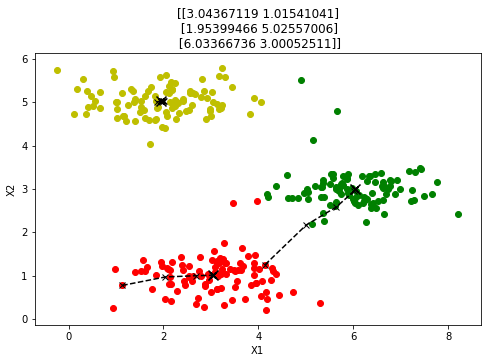

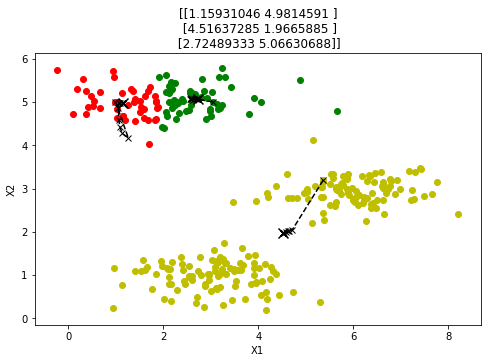

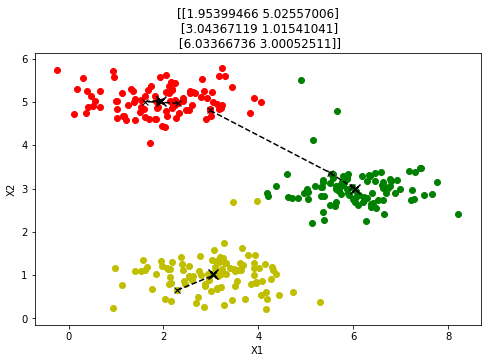

In [12]:
for minus in minus_list:
    all_minus = []
    for i in range(epoch):
        all_minus.append(minus)
        c = get_c(X, minus)
        minus = minus_updata(X, c)
        
    plt.figure(figsize=(8, 5))
    plt.title(f'{minus}')

    xx = []
    yy = []
    for m in all_minus:
        xx.append(m[:, 0])
        yy.append(m[:, 1])
    plt.plot(xx, yy, 'kx--')

    color = ['r', 'y', 'g']
    for i in range(max(c)+1):
        for j in X[c==i]:
            plt.scatter(j[0], j[1], c=color[i])

    plt.scatter(minus[:, 0], minus[:, 1], marker='x', c='k', s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')

# 2. Image compression with K-means

In [28]:
from PIL import Image

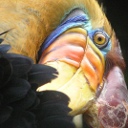

In [29]:
img = Image.open('ex7/bird_small.png')
img

In [15]:
img = np.array(img) / 255

In [16]:
X = img.reshape(-1, 3)
X.shape

(16384, 3)

In [17]:
K = 16
minus = random_init(X, K)
minus.shape

(16, 3)

In [18]:
epoch = 10
all_minus = []
for i in range(epoch):
    all_minus.append(minus)
    c = get_c(X, minus)
    minus = minus_updata(X, c)

In [19]:
img = np.zeros(X.shape)
m = all_minus[-1]
for i in range(len(m)):
    img[c == i] = m[i]

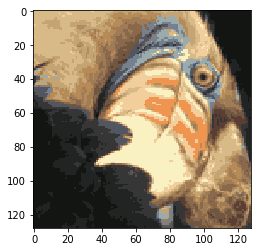

In [20]:
img = np.zeros(X.shape)
m = all_minus[-1]
for i in range(len(m)):
    img[c == i] = m[i]
    
img = img.reshape(128, 128, 3)

plt.imshow(img)

# In sklearn

In [54]:
img = Image.open('ex7/bird_small.png')
img = np.array(img)
X = img.reshape(-1, 3)

In [55]:
kmeans = KMeans(16).fit(X)

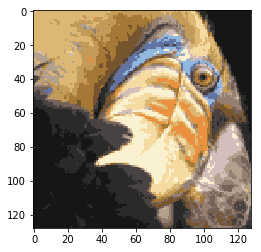

In [57]:
new_img = []
for i in kmeans.labels_:
    new_img.append(list(kmeans.cluster_centers_[i,:]))
    
new_img = np.array(new_img).reshape(128, 128, 3)/255
plt.imshow(new_img)

# 3. Principal Component Analysis (PCA)

In [8]:
data = loadmat('ex7/ex7data1.mat')
X = data['X']
X.shape

(50, 2)

Text(0, 0.5, 'X2')

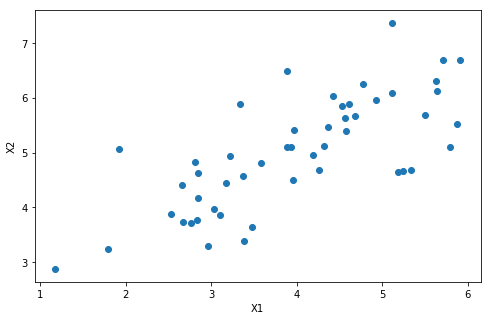

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')

# Normalize

In [23]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)
X_norm[:5, :]

array([[-0.5180535 , -1.57678415],
       [ 0.45915361,  0.83189934],
       [-1.13685138, -0.57729787],
       [-1.04345995, -1.25794647],
       [-0.97413176, -0.80837709]])

# pca

Based on the http://www.cnblogs.com/pinard/p/6251584.html

In [24]:
def pca(X):
    U, S, V = np.linalg.svd((X.T @ X) / len(X))
    return U, S, V

In [25]:
U, S, V = pca(X_norm)

In [26]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

# Dimensionality Reduction

In [27]:
def project(X, U, K):
    return np.dot(X, U[:, :K])

In [28]:
X_norm.shape, U[:, :1].shape

((50, 2), (2, 1))

In [29]:
Z = project(X_norm, U, 1) # 2d -> 1d
Z[:5]

array([[ 1.48127391],
       [-0.91291229],
       [ 1.21208656],
       [ 1.62734009],
       [ 1.26042409]])

# Reconstructing

In [30]:
X_appr = np.dot(Z, U[:, :1].T)
X_appr.shape

(50, 2)

In [31]:
X_appr[:5]

array([[-1.04741883, -1.04741883],
       [ 0.64552647,  0.64552647],
       [-0.85707463, -0.85707463],
       [-1.15070321, -1.15070321],
       [-0.89125442, -0.89125442]])

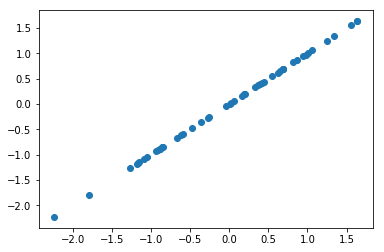

In [32]:
plt.scatter(X_appr[:, 0], X_appr[:, 1])

In [33]:
S[0] / np.sum(S)

0.8677651881696647

In [7]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(1) # 2d -> 1d
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.transform(X)[:5]

array([[ 1.49876595],
       [-0.95839024],
       [ 1.40325172],
       [ 1.76421694],
       [ 1.40760243]])

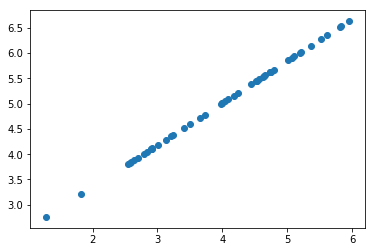

In [22]:
plt.scatter(pca.inverse_transform(pca.transform(X))[:, 0], pca.inverse_transform(pca.transform(X))[:, 1])

# 4. Face Image Dataset

In [23]:
data = loadmat('ex7/ex7faces.mat')
X = data['X']
X.shape

(5000, 1024)

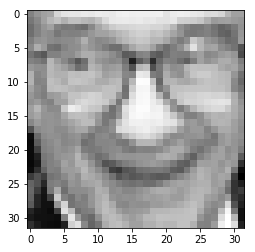

In [35]:
img = X[0].reshape(32, 32).T
plt.imshow(img, cmap = 'Greys_r')

In [36]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

In [37]:
U, S, V = pca(X_norm)
U.shape

(1024, 1024)

In [38]:
K = 36
Z = project(X_norm, U, K)
X_appr = np.dot(Z, U[:, :K].T)

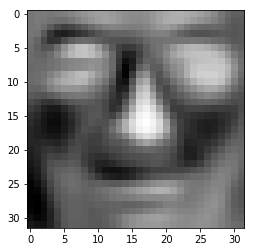

In [39]:
img = X_appr[0].reshape(32, 32).T
plt.imshow(img, cmap = 'Greys_r')

In [40]:
np.sum([S[i] for i in range(K)]) / np.sum(S)

0.831184614910983

# In sklearn

In [24]:
pca = PCA(36)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=36, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_new = pca.transform(X)

In [26]:
X_rec = pca.inverse_transform(X_new)

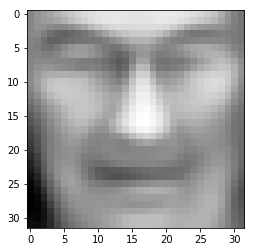

In [27]:
img = X_rec[0].reshape(32, 32).T
plt.imshow(img, cmap = 'Greys_r')